In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

In [2]:
df = pd.read_csv('flight_dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [6]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [7]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [8]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [9]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [12]:
df.rename(columns={'class':'Class'},inplace = True)

In [13]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'Class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [14]:
print(df.nunique())

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
Class                   2
duration              476
days_left              49
price               12157
dtype: int64


In [15]:
df.shape

(300153, 11)

In [16]:
df.duplicated().sum()

0

In [17]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [18]:
mean = df['duration'].mean()

In [19]:
dev = df['duration'].std()

In [20]:
upper = mean + (2*dev)
lower = mean - (2*dev)
df = df[((df['duration']<upper) & (df['duration']>lower))]

In [21]:
df.shape

(290311, 11)

<Axes: >

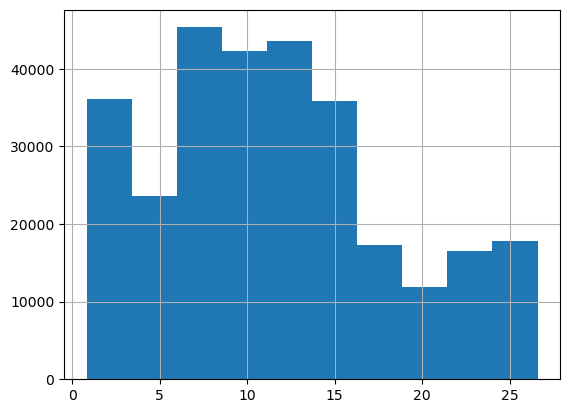

In [22]:
df['duration'].hist()

<Axes: >

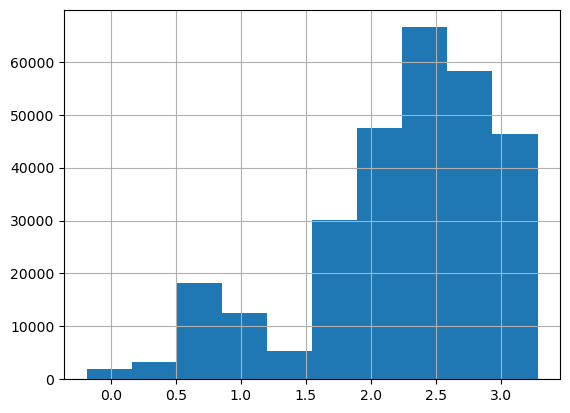

In [23]:
df['duration'] = np.log(df['duration'])
df['duration'].hist()

In [24]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [25]:
df.drop(columns = ['flight'],inplace = True)

In [26]:
df.drop(columns = ['duration'],inplace = True)

In [27]:
X = df.drop(columns = ['price'],axis = 1)
y = df['price']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [30]:
cat_col = df[['airline','source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'Class']]

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
transformer =ColumnTransformer(transformers=[('cat',OrdinalEncoder(),[0,1,2,3,4,5,6])],remainder = 'passthrough')

In [32]:
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [33]:
X_train = pd.DataFrame(X_train)

In [34]:
X_train

,0,1,2,3,4,5,6,7
0,5.0,3.0,5.0,0.0,0.0,5.0,0.0,24.0
1,5.0,5.0,1.0,0.0,5.0,1.0,1.0,38.0
2,1.0,4.0,0.0,0.0,5.0,3.0,0.0,4.0
3,5.0,0.0,4.0,0.0,5.0,5.0,1.0,42.0
4,0.0,2.0,1.0,0.0,2.0,3.0,1.0,32.0
...,...,...,...,...,...,...,...,...
203212,1.0,2.0,1.0,0.0,0.0,4.0,0.0,47.0
203213,3.0,0.0,2.0,2.0,5.0,2.0,1.0,25.0
203214,3.0,4.0,0.0,0.0,5.0,2.0,1.0,42.0
203215,5.0,3.0,5.0,0.0,0.0,2.0,1.0,39.0


In [35]:
X_train['airline'] = X_train[0]
X_train['source_city'] = X_train[1]
X_train['departure_time'] = X_train[2]
X_train['stops'] = X_train[3]
X_train['arrival_time'] = X_train[4]
X_train['destination_city'] = X_train[5]
X_train['class'] = X_train[6]
X_train['days_left'] = X_train[7]

In [36]:
X_train.drop(columns = [0,1,2,3,4,5,6,7],inplace = True)

In [37]:
X_test = pd.DataFrame(X_test)

In [38]:
X_test

,0,1,2,3,4,5,6,7
0,1.0,0.0,4.0,0.0,2.0,1.0,0.0,43.0
1,3.0,1.0,0.0,0.0,2.0,2.0,1.0,19.0
2,5.0,1.0,4.0,0.0,0.0,2.0,1.0,30.0
3,1.0,5.0,4.0,0.0,5.0,2.0,0.0,46.0
4,1.0,2.0,1.0,0.0,5.0,4.0,0.0,46.0
...,...,...,...,...,...,...,...,...
87089,5.0,1.0,4.0,0.0,2.0,0.0,0.0,9.0
87090,5.0,3.0,0.0,0.0,2.0,0.0,0.0,7.0
87091,3.0,4.0,5.0,2.0,3.0,0.0,1.0,29.0
87092,5.0,4.0,2.0,0.0,4.0,0.0,1.0,11.0


In [39]:
X_test['airline'] = X_test[0]
X_test['source_city'] = X_test[1]
X_test['departure_time'] = X_test[2]
X_test['stops'] = X_test[3]
X_test['arrival_time'] = X_test[4]
X_test['destination_city'] = X_test[5]
X_test['class'] = X_test[6]
X_test['days_left'] = X_test[7]
X_test.drop(columns = [0,1,2,3,4,5,6,7],inplace = True)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[ 1.02616079,  0.24185072,  1.46012377, ...,  1.38253196,
        -1.48344887, -0.15515674],
       [ 1.02616079,  1.38183583, -0.81666098, ..., -0.90701708,
         0.6741048 ,  0.88120729],
       [-1.16330329,  0.81184328, -1.38585717, ...,  0.23775744,
        -1.48344887, -1.63567678],
       ...,
       [-0.06857125,  0.81184328, -1.38585717, ..., -0.33462982,
         0.6741048 ,  1.1773113 ],
       [ 1.02616079,  0.24185072,  1.46012377, ..., -0.33462982,
         0.6741048 ,  0.95523329],
       [-1.16330329,  0.81184328, -0.81666098, ..., -0.33462982,
         0.6741048 , -0.89541676]])

In [42]:
X_train = pd.DataFrame(X_train)

In [43]:
X_test

array([[-1.16330329, -1.46812694,  0.89092759, ..., -0.90701708,
        -1.48344887,  1.2513373 ],
       [-0.06857125, -0.89813439, -1.38585717, ..., -0.33462982,
         0.6741048 , -0.52528675],
       [ 1.02616079, -0.89813439,  0.89092759, ..., -0.33462982,
         0.6741048 ,  0.28899927],
       ...,
       [-0.06857125,  0.81184328,  1.46012377, ..., -1.47940434,
         0.6741048 ,  0.21497327],
       [ 1.02616079,  0.81184328, -0.24746479, ..., -1.47940434,
         0.6741048 , -1.11749477],
       [ 1.02616079, -1.46812694,  0.89092759, ...,  0.8101447 ,
        -1.48344887,  1.3253633 ]])

In [44]:
X_test = pd.DataFrame(X_test)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
model = LinearRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error as MSE

In [48]:
print(MSE(y_test,prediction))

48723097.78323286


In [49]:
from sklearn.metrics import r2_score

In [50]:
print(r2_score(y_test,prediction))

0.9058999477748275


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
reg = GridSearchCV(rf,{'n_estimators':[10,15,20],'criterion':['friedman_mse', 'squared_error', 'poisson']},cv = 5,return_train_score = False)

In [53]:
reg.fit(X_train,y_train)
reg.cv_results_

{'mean_fit_time': array([ 5.22788348,  7.61468501, 10.30515347,  4.93819518,  6.87559738,
         9.58204784,  6.17422433,  8.3178514 , 12.42274418]),
 'std_fit_time': array([0.22328694, 0.68823252, 1.13520504, 0.21716871, 0.07122786,
        0.31074589, 0.17445941, 0.23199684, 0.65231488]),
 'mean_score_time': array([0.17781329, 0.26605992, 0.36628914, 0.21082516, 0.24560723,
        0.3197197 , 0.19154553, 0.24969773, 0.37454143]),
 'std_score_time': array([0.02065179, 0.03157403, 0.05655839, 0.08611143, 0.00731881,
        0.00578287, 0.0281636 , 0.01023212, 0.05394673]),
 'param_criterion': masked_array(data=['friedman_mse', 'friedman_mse', 'friedman_mse',
                    'squared_error', 'squared_error', 'squared_error',
                    'poisson', 'poisson', 'poisson'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 15,

In [54]:
df1 = pd.DataFrame(reg.cv_results_)

In [55]:
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.227883,0.223287,0.177813,0.020652,friedman_mse,10,"{'criterion': 'friedman_mse', 'n_estimators': 10}",0.961470,0.961740,0.960709,0.959978,0.961377,0.961055,0.000636,9
1,7.614685,0.688233,0.266060,0.031574,friedman_mse,15,"{'criterion': 'friedman_mse', 'n_estimators': 15}",0.962303,0.962033,0.961546,0.960694,0.961962,0.961707,0.000562,5
2,10.305153,1.135205,0.366289,0.056558,friedman_mse,20,"{'criterion': 'friedman_mse', 'n_estimators': 20}",0.962586,0.962281,0.961688,0.960929,0.962595,0.962016,0.000635,2
3,4.938195,0.217169,0.210825,0.086111,squared_error,10,"{'criterion': 'squared_error', 'n_estimators':...",0.961888,0.961307,0.960740,0.960365,0.961612,0.961182,0.000559,8
4,6.875597,0.071228,0.245607,0.007319,squared_error,15,"{'criterion': 'squared_error', 'n_estimators':...",0.962286,0.961786,0.961412,0.960737,0.961931,0.961630,0.000527,6
5,9.582048,0.310746,0.319720,0.005783,squared_error,20,"{'criterion': 'squared_error', 'n_estimators':...",0.962610,0.962362,0.961579,0.960923,0.962256,0.961946,0.000615,3
6,6.174224,0.174459,0.191546,0.028164,poisson,10,"{'criterion': 'poisson', 'n_estimators': 10}",0.961904,0.961574,0.961055,0.960368,0.961492,0.961279,0.000530,7
7,8.317851,0.231997,0.249698,0.010232,poisson,15,"{'criterion': 'poisson', 'n_estimators': 15}",0.962555,0.961923,0.961288,0.960816,0.962199,0.961756,0.000627,4
8,12.422744,0.652315,0.374541,0.053947,poisson,20,"{'criterion': 'poisson', 'n_estimators': 20}",0.962810,0.962407,0.961592,0.961133,0.962417,0.962072,0.000614,1


In [56]:
model2 = RandomForestRegressor(n_estimators = 20,criterion = 'poisson')
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [57]:
print(r2_score(y_test,y_pred))

0.9615553706091402


In [58]:
p = np.array([['SpiceJet','Delhi','Morning','zero','Morning','Mumbai','Economy',1]])
p

array([['SpiceJet', 'Delhi', 'Morning', 'zero', 'Morning', 'Mumbai',
        'Economy', '1']], dtype='<U11')

In [59]:
p = transformer.transform(p)

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [60]:
print(model2.predict(p))

[4499.1]


In [61]:
import joblib
joblib.dump(model2,'air_model.pkl')

['air_model.pkl']